<a href="https://colab.research.google.com/github/TianyiFan30/CS491/blob/main/%E2%80%9CPreProcessing_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
my_path="/content/drive/MyDrive/CS491/Data/"

# Download a novel and prepare for analysis

Some pre-processing: download novel from Gutenberg, then remove preamble and postamble

In [ ]:
title = '三國志演義'
tit='三國'
author = 'Guanzhong Luo'
url = 'https://www.gutenberg.org/cache/epub/23950/pg23950.txt'
path = my_path

In [ ]:
import os
import urllib.request  # Import the module required for making HTTP requests
# Check if the file is stored locally
filename = my_path + title
if os.path.isfile(filename) and os.stat(filename).st_size != 0:
    print("{title} file already exists".format(title=title))
    with open(filename, 'r') as f:
        raw = f.read()
else:
    print("{title} file does not already exist. Grabbing from Project Gutenberg".format(title=title))
    response = urllib.request.urlopen(url)
    raw = response.read().decode('utf-8-sig')
    print("Saving {title} file".format(title=title))
    with open(filename, 'w') as outfile:
        outfile.write(raw)


三國志演義 file already exists


In the file browser to the left, open the book. The text should (might?) appear in a cell on the right. Delete preamble and postamble, then save.

In [ ]:
##These two lines demonsrate that you have succeeded in removing the Guttenberg preamble and postamble

print(f"first 100 characters: {raw[:100]}")
print(f"last 100 characters: {raw[-100:]}")

first 100 characters: 第一回：宴桃園豪傑三結義，斬黃巾英雄首立功  　　詞曰：  　　滾滾長江東逝水，浪花淘盡英雄。是非成敗轉頭空：青山依舊在，幾度夕陽紅。白 髮漁樵江渚上，慣看秋月春風。一壺濁酒喜相逢：古今多少事，都付笑
last 100 characters: 鄧艾分兵進，漢室江山盡屬曹。丕、叡、 芳、髦纔及奐，司馬又將天下交。受禪臺前雲霧起，石頭城下無波濤。陳留歸命與安樂 ，王侯公爵從根苗。紛紛世事無窮盡，天數茫茫不可逃。鼎足三分已成夢，後人憑弔空 牢騷。


In [ ]:
# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
   raw = raw.replace(char, " ")

with open(filename, 'w') as outfile:
    outfile.write(raw)

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
all_tokens=word_tokenize(raw)#.lower())

In [ ]:
all_tokens[60:80]

['飛曰：「吾莊後有一桃園，花開正盛；明日當於園中祭告天地，我三人結為兄弟，',
 '協力同心，然後可圖大事。」玄德、雲長、齊聲應曰：「如此甚好。」次日，於桃園中',
 '，備下烏牛白馬祭禮等項，三人焚香，再拜而說誓曰：「念劉備、關羽、張飛，雖然異',
 '姓，既結為兄弟，則同心協力，救困扶危；上報國家，下安黎庶；不求同年同月同日生',
 '，但願同年同月同日死。皇天后土，實鑒此心。背義忘恩，天人共戮。」誓畢，拜玄德',
 '為兄，關羽次之，張飛為弟。祭罷天地，復宰牛設酒，聚鄉中勇士，得三百餘人，就桃',
 '園中痛飲一醉。來日收拾軍器，但恨無馬匹可乘。',
 '正思慮間，人報「有兩個客人，引一夥伴儅，趕一群馬，投莊上來。」玄德曰：「',
 '此天佑我也！」三人出莊迎接。原來二客乃中山大商：一名張世平，一名蘇雙，每年往',
 '北販馬，近因寇發而回。玄德請二人到莊，置酒管待，訴說欲討賊安民之意。二客大喜',
 '，願將良馬五十匹相送；又贈金銀五百兩，鑌鐵一千斤，以資器用。玄德謝別二客，便',
 '命良匠打造雙股劍。雲長造青龍偃月刀，又名冷豔鋸，重八十二斤。張飛造丈八點鋼矛',
 '。各置全身鎧甲。共聚鄉勇五百餘人，來見鄒靖。鄒靖引見太守劉焉。三人參見畢，各',
 '通姓名。玄德說起宗派，劉焉大喜，遂認玄德為姪。',
 '不數日，人報黃巾賊將程遠志統兵五萬來犯涿郡。劉焉令鄒靖引玄德等三人，統兵',
 '五百，前去破敵。玄德等欣然領軍前進，直至大興山下，與賊相見。賊眾皆披髮，以黃',
 '巾抹額。當下兩軍相對，玄德出馬，─左有雲長，右有翼德─，揚鞭大罵：「反國逆賊',
 '，何不早降！」',
 '程遠志大怒，遣副將鄧茂出戰。張飛挺丈八蛇矛直出，手起處，刺中鄧茂心窩，翻',
 '身落馬。程遠志見折了鄧茂，拍馬舞刀，直取張飛。雲長舞動大刀，縱馬飛迎。程遠志']

In [ ]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [ ]:
clean_tokens[60:80]

['授以密計',
 '授與一錦囊',
 '魏延必反',
 '待其反時',
 '汝與臨陣',
 '便昏然',
 '而倒',
 '至晚方甦',
 '急命尚書李福',
 '星夜至軍中問安',
 '兼詢',
 '趲程赴五丈原',
 '中道喪亡',
 '虛廢國家大事',
 '吾所用之人',
 '他自能繼吾之志',
 '在旦夕',
 '李福領了言語',
 '令左右扶上小車',
 '出寨遍觀各營']

# Zipf's Law

[Zipf's Law Wiki](https://en.wikipedia.org/wiki/Zipf%27s_law)

In [ ]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

In [ ]:
##Zipf's Law
clean_tokens_lower = [word.lower() for word in clean_tokens]
word_frequencies = Counter(clean_tokens_lower)
sorted_frequencies = sorted(word_frequencies.values(), reverse=True)

# Create an array of ranks (1, 2, 3, ...)
ranks = np.arange(1, len(sorted_frequencies) + 1)


plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the data on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

from scipy.stats import linregress

# Assuming you have already calculated ranks and sorted_frequencies as mentioned earlier
log_ranks = np.log(ranks)
log_frequencies = np.log(sorted_frequencies)

# Fit a linear regression model to the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies)

# The slope of the regression line represents the estimated exponent 's'
estimated_s = -slope

print(f"Estimated exponent 's' in Zipf's Law: {estimated_s}")

NameError: name 'clean_tokens' is not defined

# Stopwords, wordcloud, hapaxes, lexical dispersion

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=stopwords.words('english')

In [ ]:
#Note that All_words is case sensitive (later will use all_words)
#A reason for this is to preserve capitalization of proper names in a word cloud
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [ ]:
print(All_words[0:20])

['陳', '天報應我', '必', '必勝之法', '但彼若', '序', '操', '又多謀', '金石之', '以', '孔明又將孟優并朵思大王皆釋其', '卻說獻計者', '帝收張魯時', '危而後濟', '分命大將據守', '險要', '中國日盛', '之', '命司馬懿分撥諸將守把險要', '卻說孔明回到漢中']


In [ ]:
All_fd=nltk.FreqDist(All_words)

In [ ]:
All_fd

FreqDist({'之': 2, '陳': 1, '天報應我': 1, '必': 1, '必勝之法': 1, '但彼若': 1, '序': 1, '操': 1, '又多謀': 1, '金石之': 1, ...})

In [ ]:
All_fd.most_common(100)

[('之', 2),
 ('陳', 1),
 ('天報應我', 1),
 ('必', 1),
 ('必勝之法', 1),
 ('但彼若', 1),
 ('序', 1),
 ('操', 1),
 ('又多謀', 1),
 ('金石之', 1),
 ('以', 1),
 ('孔明又將孟優并朵思大王皆釋其', 1),
 ('卻說獻計者', 1),
 ('帝收張魯時', 1),
 ('危而後濟', 1),
 ('分命大將據守', 1),
 ('險要', 1),
 ('中國日盛', 1),
 ('命司馬懿分撥諸將守把險要', 1),
 ('卻說孔明回到漢中', 1),
 ('計點軍士', 1),
 ('心中甚憂', 1),
 ('各引一', 1),
 ('並不曾折一人一騎', 1),
 ('輜重等器', 1),
 ('扶起', 1),
 ('魏延', 1),
 ('廖', 1),
 ('懿', 1),
 ('各帶火具', 1),
 ('從湖口攻之', 1),
 ('滿寵引', 1),
 ('議欲', 1),
 ('與戰', 1),
 ('此取敗之', 1),
 ('計', 1),
 ('此呂蒙取荊州', 1),
 ('夏侯惠等不時截殺', 1),
 ('放心追之', 1),
 ('如燈滅', 1),
 ('承昭烈皇', 1),
 ('卻說姜維見魏延踏滅了燈', 1),
 ('心中忿怒', 1),
 ('非', 1),
 ('臥倒床上', 1),
 ('魏延領命', 1),
 ('出帳上馬', 1),
 ('姜維入帳', 1),
 ('恢復中原', 1),
 ('重興漢室', 1),
 ('奈', 1),
 ('天意如此', 1),
 ('計十萬四千一百一十二字', 1),
 ('內有八', 1),
 ('無人可授', 1),
 ('一弩可發', 1),
 ('十矢', 1),
 ('皆不必多憂', 1),
 ('惟陰平之地', 1),
 ('附耳低言', 1),
 ('授以密計', 1),
 ('授與一錦囊', 1),
 ('魏延必反', 1),
 ('待其反時', 1),
 ('汝與臨陣', 1),
 ('便昏然', 1),
 ('而倒', 1),
 ('至晚方甦', 1),
 ('急命尚書李福', 1),
 ('星夜至軍中問安', 1),
 ('兼詢', 1),
 ('趲

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

In [ ]:
font_filename = "microsoft-yahei.ttf"  # 替换为实际的字体文件名
font_path = os.path.join(my_path, font_filename)

In [ ]:
wordcloud = WordCloud(font_path=font_path,width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

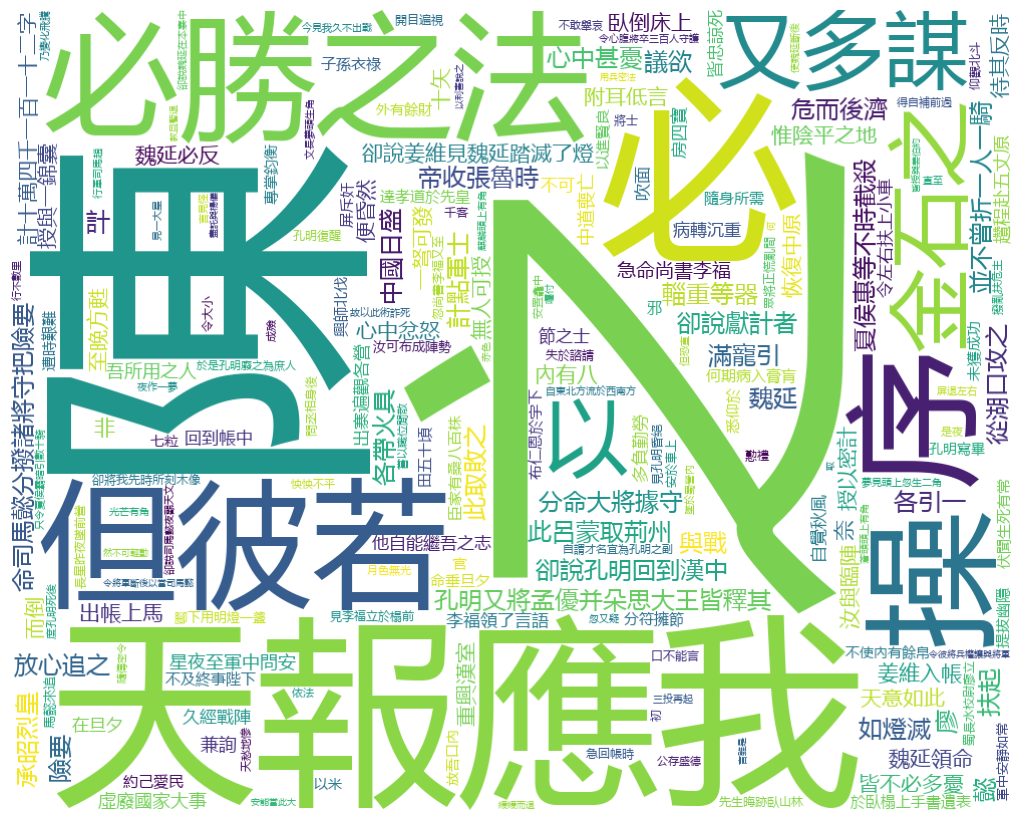

In [ ]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [ ]:
#Now working with all words lower case
all_words = [word.lower() for word in All_words]

In [ ]:
all_fd=nltk.FreqDist(all_words)

In [ ]:
single_words=all_fd.hapaxes()

In [ ]:
len(single_words)

263

In [ ]:
import random

In [ ]:
random.choices(single_words,k=20)

['急到大寨見楊儀',
 '金石之',
 '擁出一',
 '自覺秋風',
 '死者無數',
 '各帶火具',
 '出帳上馬',
 '卻將我先時所刻木像',
 '吾所用之人',
 '天意如此',
 '司馬懿知孔明死信已確',
 '奈',
 '與二將尋小路奔歸本寨',
 '分命大將據守',
 '追到山下',
 '死了',
 '仰觀北斗',
 '然不可輕動',
 '至晚方甦',
 '虛廢國家大事']

In [ ]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['之', '陳', '天報應我', '必', '必勝之法', '但彼若', '序', '操', '又多謀', '金石之']


In [ ]:
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.font_manager import FontProperties

<Figure size 1200x900 with 0 Axes>

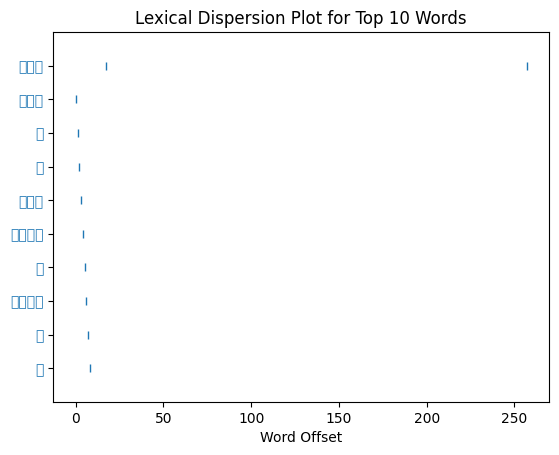

In [ ]:

plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()
font_filename = 'microsoft-yahei.ttf'
font_path = os.path.join(my_path, font_filename)

font_prop = FontProperties(fname=font_path)
#Sorry professor, I don’t know how to make the Chinese in the picture below display normally.

In [ ]:
V = set(all_words)
long_words = [w for w in V if len(w) > 12]

In [ ]:
long_words

['孔明又將孟優并朵思大王皆釋其', '卻說夏侯霸引兵至五丈原看時']

In [ ]:
big_words=sorted(w for w in set(long_words) if len(w) > 10 and all_fd[w] > 7)
len(big_words)

0

In [ ]:
print(big_words)

[]


<Figure size 1200x900 with 0 Axes>

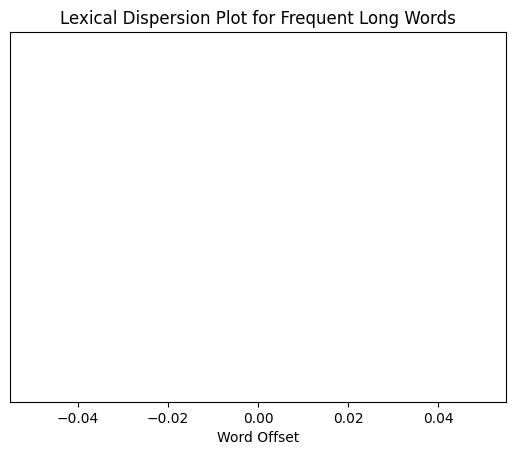

In [ ]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, big_words, ignore_case=True, title='Lexical Dispersion Plot for Frequent Long Words')
plt.show()

#Chinese characters have no big words

# Bigrams and Trigrams

In [ ]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


finder = BigramCollocationFinder.from_words(clean_tokens)



In [ ]:
frequent_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 100)
print(frequent_bigrams)

[('一弩可發', '十矢'), ('七粒', '放吾口內'), ('三投再起', '忽又疑'), ('上書一行', '只見中軍數十員上將'), ('不', '長星半夜落天樞'), ('不使內有餘帛', '外有餘財'), ('不及終事陛下', '約己愛民'), ('不可', '房四寶'), ('不敢舉哀', '依法'), ('不見一人', '吶喊搖旗'), ('不見費褘來回覆', '心中疑惑'), ('並不曾折一人一騎', '輜重等器'), ('中國日盛', '之'), ('中道喪亡', '虛廢國家大事'), ('乃夏侯霸', '乃徐徐按轡'), ('乃奮力追趕', '樹影中飄出中軍大旗'), ('乃引還', '顧謂眾'), ('乃徐徐按轡', '與二將尋小路奔歸本寨'), ('乃變化飛騰', '行不數里'), ('久經戰陣', '多負勤勞'), ('之', '事'), ('之', '命司馬懿分撥諸將守把險要'), ('事', '姜維為輔漢將軍平'), ('今見我久不出戰', '故以此術詐死'), ('他自能繼吾之志', '在旦夕'), ('令大小', '將士'), ('令姜維斷後', '依孔明遺令'), ('令將軍斷後以當司馬懿', '緩緩而退'), ('令左右扶上小車', '出寨遍觀各營'), ('令彼將兵權讓與將軍', '何'), ('令心腹將卒三百人守護', '隨傳密令'), ('以', '孔明又將孟優并朵思大王皆釋其'), ('以利害說之', '令彼將兵權讓與將軍'), ('以米', '七粒'), ('以進賢良', '屏斥奸'), ('仰觀北斗', '急回帳時'), ('伏聞生死有常', '遭時艱難'), ('但彼若', '序'), ('但恐直', '言見怪'), ('何', '急到大寨見楊儀'), ('何期病入膏肓', '命垂旦夕'), ('使魏延斷後', '卻說司馬懿夜觀天文'), ('依孔明遺令', '魏延在寨中'), ('依法', '成殮'), ('便昏然', '而倒'), ('先生晦跡臥山林', '懃禮'), ('光芒有角', '自東北方流於西南方'), ('內有八', '無人可授'), ('公存盛德', '是夜'), ('兼詢', '趲程赴五丈原'), ('出寨遍觀各營', '自覺秋風'), ('出帳上馬', '姜維入帳'), ('分命大將據守

In [ ]:
finder.apply_freq_filter(5)  # This filters out bigrams that occur less than 5 times
statistical_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 5)  # Adjust as needed
# also try bigram_measures.pmi, bigram_measures.chi_sq,likelihood_ratio,student_t,likelihood_ratio
statistical_bigrams


[]

In [ ]:
len(statistical_bigrams)

0

In [ ]:

from nltk import bigrams
from nltk.probability import ConditionalFreqDist

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        # Get the most frequent next words (up to 3)
        next_words = list(cfdist[word].keys())[:3]
        if next_words:
            # Randomly choose from the top 3 words
            word = random.choice(next_words)
        else:
            break

# Your existing list of words
# clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]  # Replace with your token list

# Generate bigrams from your list of words
clean_bigrams = bigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these bigrams
cfd = ConditionalFreqDist(clean_bigrams)

# Example usage
generate_model(cfd, '她')  # Replace 'your_seed_word' with your desired starting word


她 

In [ ]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder



# Create a trigram measures object
trigram_measures = TrigramAssocMeasures()

# Create a Trigram finder
finder = TrigramCollocationFinder.from_words(clean_tokens)

# You can then find trigrams using different measures, e.g., by raw frequency
trigrams = finder.nbest(trigram_measures.raw_freq, 10)  # top 10 trigrams
# trigrams = finder.nbest(trigram_measures.pmi, 20)  # top 10 trigrams
# trigrams=finder.nbest(trigram_measures.likelihood_ratio,20)

# Print trigrams
for trigram in trigrams:
    print(trigram)


('一弩可發', '十矢', '皆不必多憂')
('七粒', '放吾口內', '腳下用明燈一盞')
('三投再起', '忽又疑', '今見我久不出戰')
('上書一行', '只見中軍數十員上將', '擁出一')
('不', '長星半夜落天樞', '司馬懿知孔明死信已確')
('不使內有餘帛', '外有餘財', '孔明寫畢')
('不及終事陛下', '約己愛民', '達孝道於先皇')
('不可', '房四寶', '於臥榻上手書遺表')
('不敢舉哀', '依法', '成殮')
('不見一人', '吶喊搖旗', '殺入蜀寨時')


In [ ]:
import random

# 上面的 trigrams 输出结果
trigrams_output = [
    ('一弩可發', '十矢', '皆不必多憂'),
    ('七粒', '放吾口內', '腳下用明燈一盞'),
    ('三投再起', '忽又疑', '今見我久不出戰'),
    ('上書一行', '只見中軍數十員上將', '擁出一'),
    ('不', '長星半夜落天樞', '司馬懿知孔明死信已確'),
    ('不使內有餘帛', '外有餘財', '孔明寫畢'),
    ('不及終事陛下', '約己愛民', '達孝道於先皇'),
    ('不可', '房四寶', '於臥榻上手書遺表'),
    ('不敢舉哀', '依法', '成殮'),
    ('不見一人', '吶喊搖旗', '殺入蜀寨時')
]

# 创建一个接受 trigrams 列表作为初始种子的函数
def generate_model(seed_trigrams, num=15):
    for i in range(num):
        if not seed_trigrams:
            break
        seed_trigram = random.choice(seed_trigrams)
        print(' '.join(seed_trigram), end=' ')
        # 获取下一个词
        next_words = seed_trigram[-1]
        print(next_words, end=' ')
        seed_trigrams = [trigram for trigram in trigrams_output if trigram[0] == next_words]

# 以一个初始种子 trigrams 列表开始
seed_trigrams_list = [
   ('一弩可發', '十矢', '皆不必多憂'),
    ('七粒', '放吾口內', '腳下用明燈一盞'),
    ('三投再起', '忽又疑', '今見我久不出戰'),
    ('上書一行', '只見中軍數十員上將', '擁出一'),
    ('不', '長星半夜落天樞', '司馬懿知孔明死信已確'),
    ('不使內有餘帛', '外有餘財', '孔明寫畢'),
    ('不及終事陛下', '約己愛民', '達孝道於先皇'),
    ('不可', '房四寶', '於臥榻上手書遺表'),
    ('不敢舉哀', '依法', '成殮'),
    ('不見一人', '吶喊搖旗', '殺入蜀寨時')]

generate_model(seed_trigrams_list)

不可 房四寶 於臥榻上手書遺表 於臥榻上手書遺表 

# Lemmmatization, contractions

First let's normalize contractions. So we hope to replace things like "let's" with "let us" and "can't" with "cannot", etc.

In [ ]:
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.8 MB/s eta 0:00:00


In [ ]:
help(contractions)

Help on package contractions:

NAME
    contractions

PACKAGE CONTENTS
    data (package)
    test___init__

FUNCTIONS
    add(key, value)
    
    fix(s, leftovers=True, slang=True)
    
    get_combinations(tokens, joiners)
    
    intersperse(lst, item)
    
    preview(text, flank)
        Return all contractions and their location before fix for manual check. Also provide a viewing window to quickly
        preview the contractions in the text.
        :param text: texture.
        :param flank: int number, control the size of the preview window. The window would be "flank-contraction-flank".
        :return: preview_items, a list includes all matched contractions and their locations.

DATA
    comb = "you'd've"
    contractions_dict = {"'cause": 'because', "'em": 'them', "'tis": 'it i...
    json_open = b'{\n     "\'aight": "alright",\n     "abt": "ab...a": "wa...
    k = 'you’d’ve'
    leftovers_dict = {"'all": '', "'am": '', "'cause": 'because', "'coz": ...
    month = 'decemb

In [ ]:
expanded_text = contractions.fix(raw)

In [ ]:
# expanded_text

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming 'expanded_text' is your text after expanding contractions
# expanded_text = "Your expanded text here"

# Tokenize the text
tokens = word_tokenize(expanded_text)

# Lemmatize each word
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

lemmatized_text


"第一回：宴桃園豪傑三結義，斬黃巾英雄首立功 詞曰： 滾滾長江東逝水，浪花淘盡英雄。是非成敗轉頭空：青山依舊在，幾度夕陽紅。白 髮漁樵江渚上，慣看秋月春風。一壺濁酒喜相逢：古今多少事，都付笑談中。 話說天下大勢，分久必合，合久必分：周末七國分爭，并入於秦。及秦滅之後，楚 、漢分爭，又并入於漢。漢朝自高祖斬白蛇而起義，一統天下。後來光武中興，傳至獻 帝，遂分為三國。推其致亂之由，殆始於桓、靈二帝。桓帝禁錮善類，崇信宦官。及桓 帝崩，靈帝即位，大將軍竇武、太傅陳蕃，共相輔佐。時有宦官曹節等弄權，竇武、陳 蕃謀誅之，作事不密，反為所害。中涓自此愈橫。 建寧二年四月望日，帝御溫德殿。方陞座，殿角狂風驟起，只見一條大青蛇，從梁 上飛將下來，蟠於椅上。帝驚倒，左右急救入宮，百官俱奔避。須臾，蛇不見了。忽然 大雷大雨，加以冰雹，落到半夜方止，壞卻房屋無數。建寧四年二月，洛陽地震；又海 水泛溢，沿海居民，盡被大浪捲入海中。光和元年，雌雞化雄。六月朔，黑氣十餘丈， 飛入溫德殿中。秋七月，有虹見於玉堂；五原山岸，盡皆崩裂。種種不祥，非止一端。 帝下詔問群臣以災異之由，議郎蔡邕上疏，以為蜺墮雞化，乃婦寺干政之所致，言 頗切直。帝覽奏歎息，因起更衣。曹節在後竊視，悉宣告左右。遂以他事陷邕於罪，放 歸田里。後張讓，趙忠，封諝，段珪，曹節，候覽，蹇碩，程曠，夏惲，郭勝十人朋比 為奸，號為「十常侍」。帝尊信張讓，呼為「阿父」，朝政日非，以致天下人心思亂， 盜賊蜂起。 時鉅鹿郡有兄弟三人：一名張角，一名張寶，一名張梁。那張角本是個不第秀才。 因入山採藥，遇一老人，碧眼童顏，手執藜杖，喚角至一洞中，以天書三卷授之，曰： 「此名太平要術。汝得之，當代天宣化，普救世人；若萌異心，必獲惡報。」角拜問姓 名。老人曰：「吾乃南華老仙也。」言訖，化陣清風而去。 角得此書，曉夜攻習，能呼風喚雨，號為太平道人。中平元年正月內，疫氣流行， 張角散施符水，為人治病，自稱大賢良師。角有徒弟五百餘人，雲游四方，皆能書符念 咒。次後徒眾日多，角乃立三十六方，─大方萬餘人，小方六七千─，各立渠帥，稱為 將軍。訛言「蒼天已死，黃天當立。」又云「歲在甲子，天下大吉。」令人各以白土， 書「甲子」二字於家中大門上。青、幽、徐、冀、荊、揚、兗、豫八州之人，家家侍奉 大賢良師張角名字。角遣其黨馬元義，暗齎金帛，結交中涓封諝，以為內應。角與

In [ ]:
lemmatized_text[30:200]

'東逝水，浪花淘盡英雄。是非成敗轉頭空：青山依舊在，幾度夕陽紅。白 髮漁樵江渚上，慣看秋月春風。一壺濁酒喜相逢：古今多少事，都付笑談中。 話說天下大勢，分久必合，合久必分：周末七國分爭，并入於秦。及秦滅之後，楚 、漢分爭，又并入於漢。漢朝自高祖斬白蛇而起義，一統天下。後來光武中興，傳至獻 帝，遂分為三國。推其致亂之由，殆始於桓、靈二帝。桓帝'

In [ ]:
all_tokens=word_tokenize(lemmatized_text)#.lower())

In [ ]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [ ]:
print(clean_tokens[0:100])

['陳', '天報應我', '必', '必勝之法', '但彼若', '序', '操', '又多謀', '金石之', '以', '孔明又將孟優并朵思大王皆釋其', '卻說獻計者', '帝收張魯時', '危而後濟', '分命大將據守', '險要', '中國日盛', '之', '命司馬懿分撥諸將守把險要', '卻說孔明回到漢中', '計點軍士', '心中甚憂', '各引一', '並不曾折一人一騎', '輜重等器', '扶起', '魏延', '廖', '懿', '各帶火具', '從湖口攻之', '滿寵引', '議欲', '與戰', '此取敗之', '計', '此呂蒙取荊州', '夏侯惠等不時截殺', '放心追之', '如燈滅', '承昭烈皇', '卻說姜維見魏延踏滅了燈', '心中忿怒', '非', '臥倒床上', '魏延領命', '出帳上馬', '姜維入帳', '恢復中原', '重興漢室', '奈', '天意如此', '計十萬四千一百一十二字', '內有八', '無人可授', '一弩可發', '十矢', '皆不必多憂', '惟陰平之地', '附耳低言', '授以密計', '授與一錦囊', '魏延必反', '待其反時', '汝與臨陣', '便昏然', '而倒', '至晚方甦', '急命尚書李福', '星夜至軍中問安', '兼詢', '趲程赴五丈原', '中道喪亡', '虛廢國家大事', '吾所用之人', '他自能繼吾之志', '在旦夕', '李福領了言語', '令左右扶上小車', '出寨遍觀各營', '自覺秋風', '吹面', '回到帳中', '病轉沉重', '皆忠諒死', '節之士', '久經戰陣', '多負勤勞', '不可', '房四寶', '於臥榻上手書遺表', '伏聞生死有常', '遭時艱難', '分符擁節', '專掌鈞衡', '興師北伐', '未獲成功', '何期病入膏肓', '命垂旦夕', '不及終事陛下']


In [ ]:
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [ ]:
print(All_words[0:100])

['陳', '天報應我', '必', '必勝之法', '但彼若', '序', '操', '又多謀', '金石之', '以', '孔明又將孟優并朵思大王皆釋其', '卻說獻計者', '帝收張魯時', '危而後濟', '分命大將據守', '險要', '中國日盛', '之', '命司馬懿分撥諸將守把險要', '卻說孔明回到漢中', '計點軍士', '心中甚憂', '各引一', '並不曾折一人一騎', '輜重等器', '扶起', '魏延', '廖', '懿', '各帶火具', '從湖口攻之', '滿寵引', '議欲', '與戰', '此取敗之', '計', '此呂蒙取荊州', '夏侯惠等不時截殺', '放心追之', '如燈滅', '承昭烈皇', '卻說姜維見魏延踏滅了燈', '心中忿怒', '非', '臥倒床上', '魏延領命', '出帳上馬', '姜維入帳', '恢復中原', '重興漢室', '奈', '天意如此', '計十萬四千一百一十二字', '內有八', '無人可授', '一弩可發', '十矢', '皆不必多憂', '惟陰平之地', '附耳低言', '授以密計', '授與一錦囊', '魏延必反', '待其反時', '汝與臨陣', '便昏然', '而倒', '至晚方甦', '急命尚書李福', '星夜至軍中問安', '兼詢', '趲程赴五丈原', '中道喪亡', '虛廢國家大事', '吾所用之人', '他自能繼吾之志', '在旦夕', '李福領了言語', '令左右扶上小車', '出寨遍觀各營', '自覺秋風', '吹面', '回到帳中', '病轉沉重', '皆忠諒死', '節之士', '久經戰陣', '多負勤勞', '不可', '房四寶', '於臥榻上手書遺表', '伏聞生死有常', '遭時艱難', '分符擁節', '專掌鈞衡', '興師北伐', '未獲成功', '何期病入膏肓', '命垂旦夕', '不及終事陛下']


In [ ]:
All_fd=nltk.FreqDist(All_words)

In [ ]:
All_fd

FreqDist({'之': 2, '陳': 1, '天報應我': 1, '必': 1, '必勝之法': 1, '但彼若': 1, '序': 1, '操': 1, '又多謀': 1, '金石之': 1, ...})

In [ ]:
wordcloud = WordCloud(font_path=font_path,width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

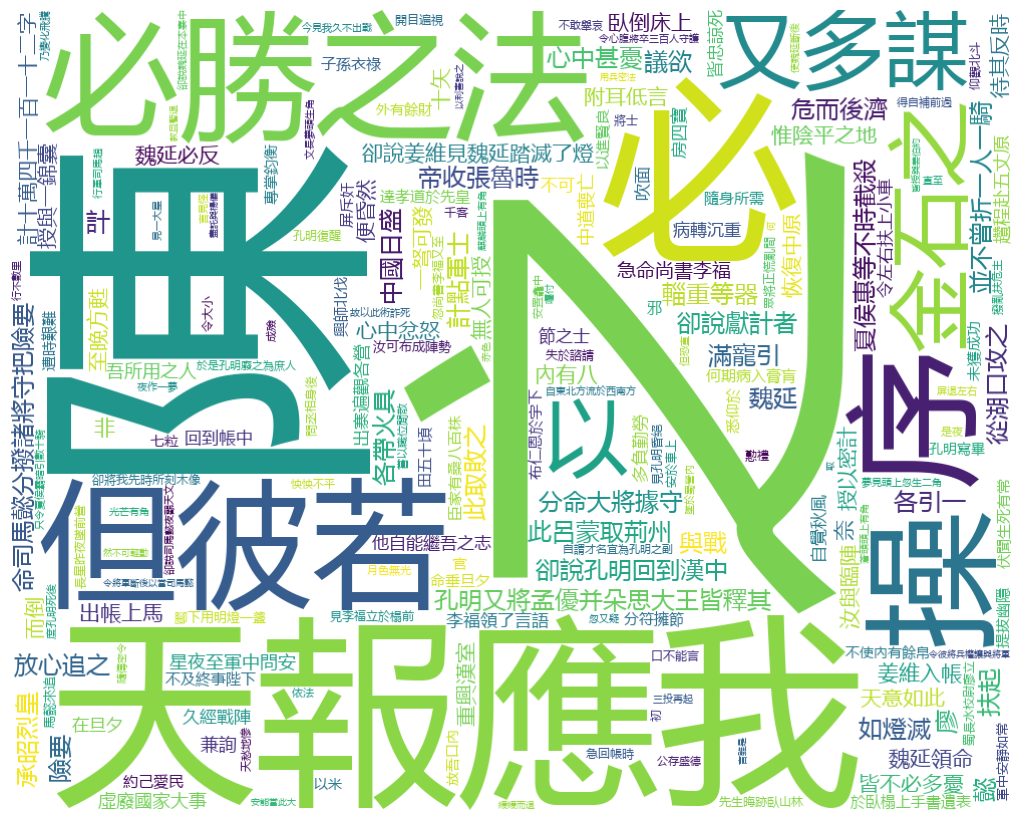

In [ ]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [ ]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['之', '陳', '天報應我', '必', '必勝之法', '但彼若', '序', '操', '又多謀', '金石之']


<Figure size 1200x900 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38515 (\N{CJK UNIFIED IDEOGRAPH-9673}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22577 (\N{CJK UNIFIED IDEOGRAPH-5831}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25033 (\N{CJK UNIFIED IDEOGRAPH-61C9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

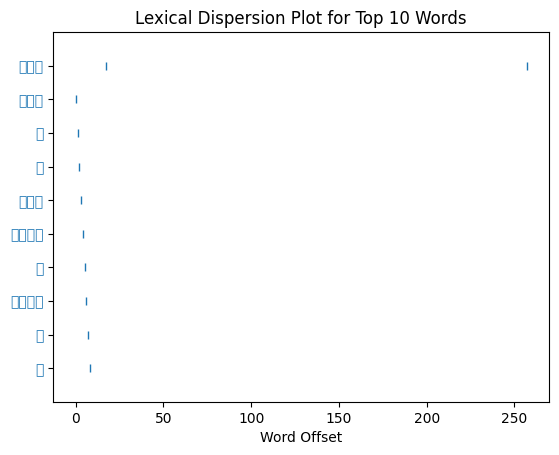

In [ ]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()